In [14]:
import os
import cv2
from glob import glob
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [6]:
label_list = glob('../Desktop/2nd_label/*')

In [7]:
for label_path in label_list:
    label_img = cv2.imread(label_path, 0)
    
    break

In [8]:
cv2.__version__

'3.4.8'

In [17]:
img_path = 'C:/Users/sungjoo/Desktop/pngimage2'
mask_path = 'C:/Users/sungjoo/Desktop/overlaylabel'
save_path = 'C:/Users/sungjoo/Desktop/overlay/'

In [18]:
for i,j in zip(os.listdir(img_path),os.listdir(mask_path)):
    
    
        img= os.path.join(img_path,i)
        image = cv2.imread(img,0)
#         print(image)
    
        msk= os.path.join(mask_path,j)
        mask =cv2.imread(msk,0)
    
        dst = cv2.addWeighted(image, 0.7, mask, 0.3, 0)

        cv2.imwrite(os.path.join(save_path,i),dst)

In [18]:
img = cv2.imread(img_path,0)
msk = cv2.imread(mask_path,0)

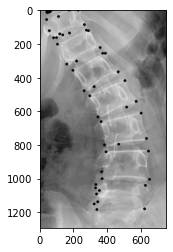

In [19]:
plt.imshow(img,cmap='gray')

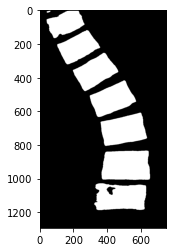

In [20]:
plt.imshow(msk,cmap='gray')

In [21]:
dst = cv2.addWeighted(img.astype(int), 0.7, msk.astype(int), 0.3, 0)

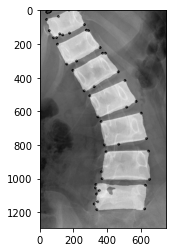

In [22]:
plt.imshow(dst, cmap='gray')

In [24]:
import os
import cv2
import SimpleITK as sitk
from glob import glob
import numpy as np

# 환자 단위 리스트 생성
patList = sorted(glob('C:/Users/sungjoo/Desktop/d/Label/*'))

# 저장 폴더 생성
save_dir = 'C:/Users/sungjoo/Desktop/overlaylabel/'
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

# nii.gz 파일을 numpy array로 읽어오는 함수
def ReadSitkasArr(sitk_path):
    sitk_img = sitk.ReadImage(sitk_path)
    return sitk.GetArrayFromImage(sitk_img)

# 각 환자에 대하여, (ex. scoliosis/original_dataset/labels/HIRA20_SC_000001/)
for patDir in patList:
    # 환자 이름 (ex. HIRA20_SC_000001)
    patID = patDir.split(os.sep)[-1]
    
    # Label 리스트 생성 
    label_list = sorted(glob(os.path.join(patDir, '*.nii.gz')))
    
    # 각 label에 대하여, (ex. scoliosis/original_dataset/labels/HIRA20_SC_000001/A.nii.gz)
    for i, label_path in enumerate(label_list):
        # Label을 array로 읽어오기
        label_arr = ReadSitkasArr(label_path)

        # (height, width)로 shape 맞추기
        if np.ndim(label_arr) == 3: # (1, height, width)
            label_arr = label_arr[0]
        elif np.ndim(label_arr) == 4: # (2, 1, height, width)
            label_arr = label_arr[0,0]

        # Label 병합
        if i==0:
            label_merged = label_arr
        else:
            label_merged = (label_merged != 0) | (label_arr != 0)
    
    # opencv로 저장 (ex. scoliosis/png_label/HIRA20_SC_000001.png)
    label_merged = (label_merged*255).astype(np.uint8)
    cv2.imwrite(os.path.join(save_dir, '%s_label.png'%patID), label_merged)

In [3]:
from os.path import join
import SimpleITK as sitk
import numpy as np
import cv2
from glob import glob
import os

def window_img(img, center, width):
    window_min = center - width // 2
    window_max = center + width // 2

    img_windowed = img.copy()
    img_windowed[img_windowed < window_min] = window_min
    img_windowed[img_windowed > window_max] = window_max

    return img_windowed

def convert_to_uint8(img):
    if img.shape[0] == 1 and np.ndim(img) == 3:
        img = img[0]
    
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img = (img * 255).astype(np.uint8)

    return img

img_path = 'C:/Users/sungjoo/Desktop/d/dataset2/'
save_dir = 'C:/Users/sungjoo/Desktop/pngimage2/'


for i in os.listdir(img_path):
#     for im in os.listdir(img_path+'/'+i):
        
        img = os.path.join(img_path, i)
        sitk_image = sitk.ReadImage(img)
        numpy_image = sitk.GetArrayFromImage(sitk_image)[0]
        
        try :
            center = int(float(sitk_image.GetMetaData('0028|1050')))
            width = int(float(sitk_image.GetMetaData('0028|1051')))
        except Exception as e:
        # print(cls_dir)
            center = int(float(sitk_image.GetMetaData('0028|1050').split('\\')[0]))
            width = int(float(sitk_image.GetMetaData('0028|1051').split('\\')[0]))

        numpy_image = window_img(numpy_image, center, width)
        numpy_image = convert_to_uint8(numpy_image)
        cv2.imwrite(join(save_dir,i.split('/')[-1].split('.')[0]+'.png'), numpy_image)